In [17]:
from xgboost import XGBClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터셋 불러오기
df = pd.read_csv('dataset.csv', index_col=0)

X = df.drop(columns=['Result'])
y = df['Result']

# 클래스 값을 [-1, 1]에서 [0, 1]로 변환
y = y.replace(-1, 0)

In [18]:
# 학습 데이터와 테스트 데이터로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 학습
model = XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [19]:
# 피처 중요도 값 배열 형태로 반환
ft_importance_values = model.feature_importances_

# 피처 중요도 시리즈로 변환 (모든 피처에 대해)
ft_series = pd.Series(ft_importance_values, index=X_train.columns)

# 중요도 순으로 정렬
ft_sorted = ft_series.sort_values(ascending=False)

In [20]:
# 피처 중요도를 데이터프레임으로 정렬
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': ft_importance_values
}).sort_values(by='importance', ascending=False)

# 피처 중요도 출력
print(importance_df)

                        feature  importance
7                SSLfinal_State    0.401798
13                URL_of_Anchor    0.169335
5                 Prefix_Suffix    0.123835
15                          SFH    0.025914
25                  web_traffic    0.025369
27                 Google_Index    0.020072
14                Links_in_tags    0.018495
24                    DNSRecord    0.014685
6             having_Sub_Domain    0.014175
2            Shortining_Service    0.013374
28       Links_pointing_to_page    0.012488
11                  HTTPS_token    0.012356
22                       Iframe    0.011788
19                 on_mouseover    0.011548
21                  popUpWidnow    0.010584
12                  Request_URL    0.010577
0    having_IPhaving_IP_Address    0.010434
1                 URLURL_Length    0.010146
26                    Page_Rank    0.009013
4      double_slash_redirecting    0.008459
9                       Favicon    0.008196
23                age_of_domain 

<ipython-input-21-ba9b405c5153>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df, palette='viridis')


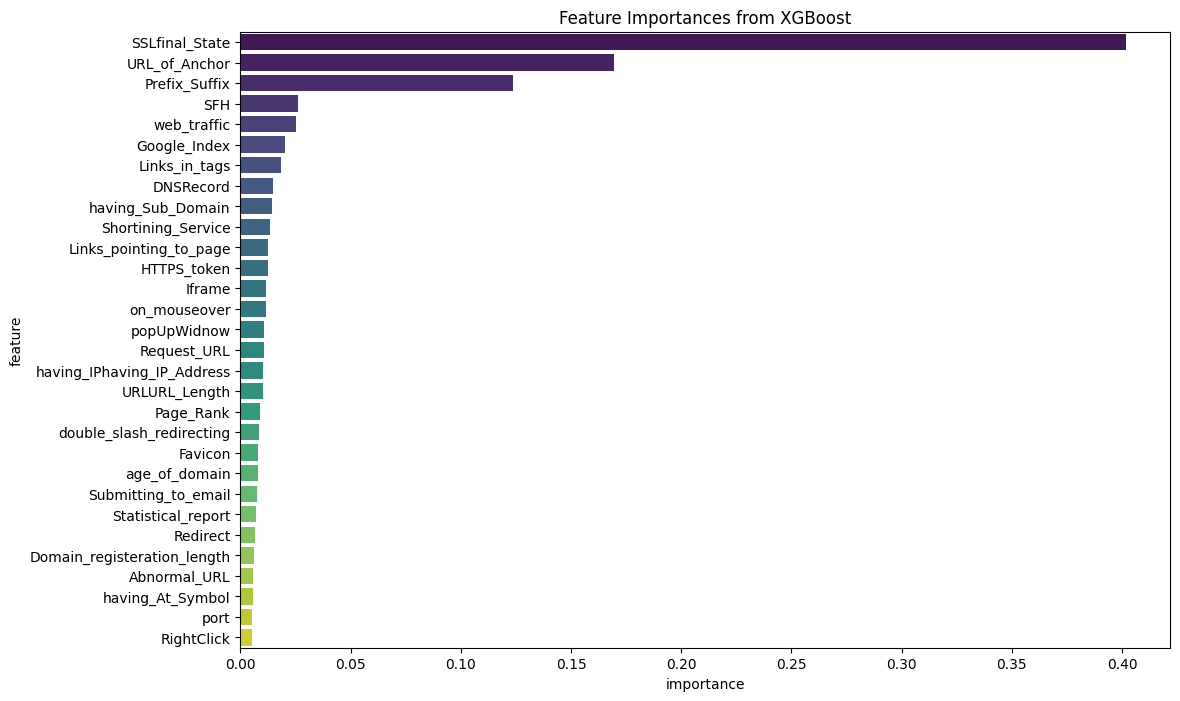

In [21]:
# 피처 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df, palette='viridis')
plt.title('Feature Importances from XGBoost')
plt.show()